### Importing necessary libraries

In [1]:
import pandas as pd  
import numpy as np 

### Reading the dataset

In [2]:
df = pd.read_csv('dementia_dataset.csv')
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [3]:
df.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


### Cleaning the data

In [4]:
# checking if any columns have null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


we can see that columns 'SES', 'MMSE' have null values

In [5]:
df[df['SES'].isnull()]

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
10,OAS2_0007,OAS2_0007_MR1,Demented,1,0,M,R,71,16,NaN,28.0,0.5,1357,0.748,1.293
11,OAS2_0007,OAS2_0007_MR3,Demented,3,518,M,R,73,16,NaN,27.0,1.0,1365,0.727,1.286
12,OAS2_0007,OAS2_0007_MR4,Demented,4,1281,M,R,75,16,NaN,27.0,1.0,1372,0.710,1.279
134,OAS2_0063,OAS2_0063_MR1,Demented,1,0,F,R,80,12,NaN,30.0,0.5,1430,0.737,1.228
135,OAS2_0063,OAS2_0063_MR2,Demented,2,490,F,R,81,12,NaN,27.0,0.5,1453,0.721,1.208
207,OAS2_0099,OAS2_0099_MR1,Demented,1,0,F,R,80,12,NaN,27.0,0.5,1475,0.762,1.190
208,OAS2_0099,OAS2_0099_MR2,Demented,2,807,F,R,83,12,NaN,23.0,0.5,1484,0.750,1.183


lets give SES value 2.5 (average socio economic status) to rows with null values

In [6]:
df["SES"].fillna(2.5,inplace=True)


In [7]:
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,2.5,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,2.5,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,2.5,22.0,0.5,1698,0.701,1.034


In [8]:
df = df.dropna(axis = 0, how ='any')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  371 non-null    object 
 1   MRI ID      371 non-null    object 
 2   Group       371 non-null    object 
 3   Visit       371 non-null    int64  
 4   MR Delay    371 non-null    int64  
 5   M/F         371 non-null    object 
 6   Hand        371 non-null    object 
 7   Age         371 non-null    int64  
 8   EDUC        371 non-null    int64  
 9   SES         371 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         371 non-null    float64
 12  eTIV        371 non-null    int64  
 13  nWBV        371 non-null    float64
 14  ASF         371 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 46.4+ KB


In [10]:
#encoding the groups into numerical values
from sklearn.preprocessing import LabelEncoder

label_encoder= LabelEncoder()
df['Group']= label_encoder.fit_transform(df['Group'])
df['Group'].unique()

array([2, 1, 0])

no null values in the dataset now.

C:\Users\rajas\AppData\Local\Temp\ipykernel_544\13906680.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot= True, cmap= 'Reds', annot_kws={'size': 7})


<AxesSubplot: >

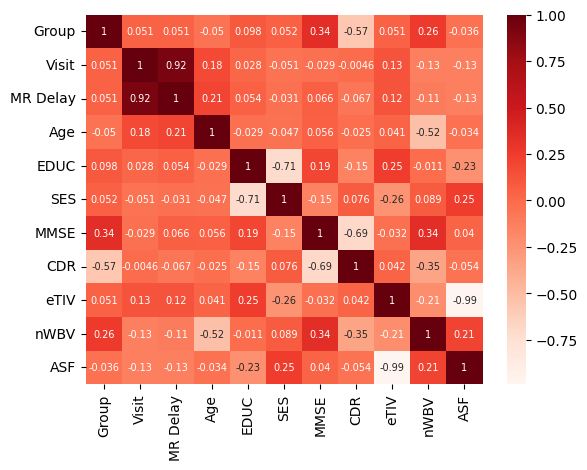

In [11]:
import seaborn as sns

sns.heatmap(df.corr(), annot= True, cmap= 'Reds', annot_kws={'size': 7})

In [12]:
len(df['Subject ID'].unique())

150

In [13]:
# sns.pairplot(data = df.corr())
df.columns

Index(['Subject ID', 'MRI ID', 'Group', 'Visit', 'MR Delay', 'M/F', 'Hand',
       'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF'],
      dtype='object')

In [14]:

import plotly.express as px
  
fig = px.scatter(df, x="CDR", y="Group",
                 size='Group', 
                 )
  
fig.show()

We can see from the graph that patients with CDR value 0 or 0.5 are of group 2 (Non demented). few people with CDR 0.5 have dementia(group 1). And people with CDR value 1 and 2 belong to group 1 (having dementia)

In [15]:

import plotly.express as px
  
fig = px.scatter(df, x="MMSE", y="Group",
                 size='Group', 
                 )
  
fig.show()

we can see that people not having dementia (group 2) have high MMSE scores compared to those affected with dementia. We can also see some patients have high scores even though they have dementia.

In [16]:
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,2,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,2,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,1,1,0,M,R,75,12,2.5,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,1,2,560,M,R,76,12,2.5,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,1,3,1895,M,R,80,12,2.5,22.0,0.5,1698,0.701,1.034


### Exploratory data analysis

In [17]:
# columns Subject ID, MRI ID can be dropped as they are unique for all rows
data = df.drop('Subject ID',axis = 1)
data = data.drop('MRI ID',axis = 1)

data.head()

,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,2,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,2,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,1,1,0,M,R,75,12,2.5,23.0,0.5,1678,0.736,1.046
3,1,2,560,M,R,76,12,2.5,28.0,0.5,1738,0.713,1.010
4,1,3,1895,M,R,80,12,2.5,22.0,0.5,1698,0.701,1.034


In [18]:

data['Group'].unique()

array([2, 1, 0])

In [19]:
#dropping the hand column because every patient is right handed
data = data.drop('Hand',axis = 1)
data.head()

,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,2,1,0,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,2,2,457,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,1,1,0,M,75,12,2.5,23.0,0.5,1678,0.736,1.046
3,1,2,560,M,76,12,2.5,28.0,0.5,1738,0.713,1.010
4,1,3,1895,M,80,12,2.5,22.0,0.5,1698,0.701,1.034


In [20]:
#Encoding M/F column with numerical values
def func_M(x):
    if(x=='M'):
        return 1
    else:
        return 0

In [21]:
data['M/F']= data['M/F'].apply(func_M)

In [22]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(data.drop('Group',axis=1),data['Group'],test_size = 0.3,random_state=30)


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rfc = RandomForestClassifier()

rfc_scores = []

for i in range(10):
    rfc.fit(X_train,y_train)  # this line will train the model
    y_pred = rfc.predict(X_test) # here we predict dementia group on testing dataset. y_pred has group values either 2(Non demented) or 1(demented) or 0 (converted)

    model_accuracy = accuracy_score(y_test,y_pred) # y_test is actual value of group. y_pred is the value that we predicted using our model. and we compare predicted values with actual values to calculate accuracy.
    
    rfc_scores.append(model_accuracy)

print('Accuracy of Random forest classifier = ',np.mean(rfc_scores))


Accuracy of Random forest classifier =  0.9455357142857143
